# Section-12: <font color='blue'>Revision On Pandas</font>

### Data Science (15 sections) Compiled by :
                   Alem H Fitwi, 
                   PhD Student (Privacy, Deep Learning, Networking (Edge Computing), IoD, Surveillance Systems),
                   GA-Data Analyst,
                   Binghamton University-State University of New York
                   December, 2017 

# <font color='green'>1. Introduction</font>

In [110]:
# Reading CSV dataset
import pandas as pd
df=pd.read_csv('./0_Datasets/nyc_weather.csv')

In [111]:
# Check columns
df.columns

Index(['EST', 'Temperature', 'DewPoint', 'Humidity', 'Sea Level PressureIn',
       'VisibilityMiles', 'WindSpeedMPH', 'PrecipitationIn', 'CloudCover',
       'Events', 'WindDirDegrees'],
      dtype='object')

In [112]:
# Check size
df.shape

(31, 11)

In [113]:
# Check info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
EST                     31 non-null object
Temperature             31 non-null int64
DewPoint                31 non-null int64
Humidity                31 non-null int64
Sea Level PressureIn    31 non-null float64
VisibilityMiles         31 non-null int64
WindSpeedMPH            28 non-null float64
PrecipitationIn         31 non-null object
CloudCover              31 non-null int64
Events                  9 non-null object
WindDirDegrees          31 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.7+ KB


In [115]:
df.dtypes # Check types

EST                      object
Temperature               int64
DewPoint                  int64
Humidity                  int64
Sea Level PressureIn    float64
VisibilityMiles           int64
WindSpeedMPH            float64
PrecipitationIn          object
CloudCover                int64
Events                   object
WindDirDegrees            int64
dtype: object

In [5]:
# Max temperature
df['Temperature'].max()

50

In [7]:
# EST dates on whcih the events are equal to rain
df['EST'][df['Events']=='Rain']

8      1/9/2016
9     1/10/2016
15    1/16/2016
26    1/27/2016
Name: EST, dtype: object

In [8]:
# Filling missing or NaN values with 0
df.fillna(0, inplace=True)

In [9]:
# Mean value
df['WindSpeedMPH'].mean()

6.225806451612903

# <font color='green'>2. DataFrame Basics</font>

Dataframe is most commonly used object in pandas. It is a table like datastructure containing rows and columns similar to excel spreadsheet

In [10]:
import pandas as pd

In [12]:
# Creating Dataframe from a dictionary
weather_data = {
    'day': ['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperature': [32,35,28,24,32,31],
    'windspeed': [6,7,2,7,4,2],
    'event': ['Rain', 'Sunny', 'Snow','Snow','Rain', 'Sunny']
}
df = pd.DataFrame(weather_data)
df = pd.read_csv("./0_Datasets/weather_data.csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [13]:
# rows, columns=df.shape
df.shape

(6, 4)

## <font color='blue'>2.1 Handling Rows</font>

In [14]:
df.head(2) # df.head() displasy the first 5 rows by default

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny


In [15]:
df.tail(2) # df.tail() displasy the last 5 rows by default

,day,temperature,windspeed,event
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [16]:
df[1:3] # rows 1 to 2

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


## <font color='blue'>2.2 Handling Columns</font>

In [17]:
df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [18]:
df['day'] # or df.day

0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [19]:
# Type of column
type(df['day'])

pandas.core.series.Series

In [20]:
# Display multiple columns [[ ]]
df[['day','temperature']]

,day,temperature
0,1/1/2017,32
1,1/2/2017,35
2,1/3/2017,28
3,1/4/2017,24
4,1/5/2017,32
5,1/6/2017,31


## <font color='blue'>2.3 Operations on DataFrame</font>

In [21]:
df['temperature'].max()

35

In [22]:
df[df['temperature']>32]

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny


In [23]:
# Kinda doing SQL in pandas
df['day'][df['temperature'] == df['temperature'].max()] 

1    1/2/2017
Name: day, dtype: object

In [24]:
df[df['temperature'] == df['temperature'].max()] # Kinda doing SQL in pandas

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny


In [25]:
df['temperature'].std() # std of a whole column

3.8297084310253524

In [26]:
# Statistics of the dataset
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


## <font color='blue'>2.4 Setting Index</font>

In [29]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [27]:
df.head(2)

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny


In [28]:
# Replace original index with day index
df.set_index('day') # Temporal change of index

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,35,7,Sunny
1/3/2017,28,2,Snow
1/4/2017,24,7,Snow
1/5/2017,32,4,Rain
1/6/2017,31,2,Sunny


In [30]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [31]:
# Make change permanent using inplace=True
df.set_index('day', inplace=True)
df.index

Index(['1/1/2017', '1/2/2017', '1/3/2017', '1/4/2017', '1/5/2017', '1/6/2017'], dtype='object', name='day')

In [32]:
df.loc['1/2/2017']

temperature       35
windspeed          7
event          Sunny
Name: 1/2/2017, dtype: object

In [33]:
# Reset index back to the original values
df.reset_index(inplace=True)
df.index

RangeIndex(start=0, stop=6, step=1)

In [34]:
# This is kind of building a hash map using event as a key
df.set_index('event',inplace=True) 
df

,day,temperature,windspeed
event,,,
Rain,1/1/2017,32,6
Sunny,1/2/2017,35,7
Snow,1/3/2017,28,2
Snow,1/4/2017,24,7
Rain,1/5/2017,32,4
Sunny,1/6/2017,31,2


In [35]:
df.loc['Snow'] # accessing rows by index

,day,temperature,windspeed
event,,,
Snow,1/3/2017,28,2
Snow,1/4/2017,24,7


In [36]:
df[df.index=='Snow'] # Use index logic to selectively access rows

,day,temperature,windspeed
event,,,
Snow,1/3/2017,28,2
Snow,1/4/2017,24,7


In [37]:
df.reset_index(inplace=True)
df[df.event=='Snow']

,event,day,temperature,windspeed
2,Snow,1/3/2017,28,2
3,Snow,1/4/2017,24,7


# <font color='green'>3. Different Ways Of Creating Dataframe</font>

## <font color='blue'>3.1 Using CSV</font>

In [40]:
df = pd.read_csv("./0_Datasets/weather_data2.csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


## <font color='blue'>3.2 Using Excel</font>

In [41]:
df=pd.read_excel("./0_Datasets/weather_data.xlsx","Sheet1")
df

,day,temperature,windspeed,event
0,2017-01-01,32,6,Rain
1,2017-01-02,35,7,Sunny
2,2017-01-03,28,2,Snow


## <font color='blue'>3.3 Using Dictionary</font>

In [42]:
# A one key-values of dictionary represents a column
import pandas as pd
weather_data = {
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'windspeed': [6,7,2],
    'event': ['Rain', 'Sunny', 'Snow']
}
df = pd.DataFrame(weather_data)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


## <font color='blue'>3.4 Using Tuples List</font>

In [44]:
# A tuple list forms a row
weather_data = [
    ('1/1/2017',32,6,'Rain'),
    ('1/2/2017',35,7,'Sunny'),
    ('1/3/2017',28,2,'Snow')
]
df = pd.DataFrame(data=weather_data, columns=['day','temperature','windspeed','event'])
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


## <font color='blue'>3.5 Using List of Dictionaries</font>

In [45]:
weather_data = [
    {'day': '1/1/2017', 'temperature': 32, 'windspeed': 6, 'event': 'Rain'},
    {'day': '1/2/2017', 'temperature': 35, 'windspeed': 7, 'event': 'Sunny'},
    {'day': '1/3/2017', 'temperature': 28, 'windspeed': 2, 'event': 'Snow'},
    
]
df = pd.DataFrame(data=weather_data, columns=['day','temperature','windspeed','event'])
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


# <font color='green'>4. Read/Write CSV and Excel Files in Pandas</font>

## <font color='blue'>4.1 Reading CSV and processing</font>

In [46]:
import pandas as pd

df = pd.read_csv("./0_Datasets/stock_data.csv")
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [48]:
df = pd.read_csv("./0_Datasets/stock_data.csv", skiprows=1)
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


In [50]:
df = pd.read_csv("./0_Datasets/stock_data.csv", header=1) # skiprows and header are kind of same
df

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


In [51]:
df = pd.read_csv("./0_Datasets/stock_data.csv", header=None, 
                 names = ["ticker","eps","revenue","people"])
df

,ticker,eps,revenue,people
tickers,eps,revenue,price,people
GOOGL,27.82,87,845,larry page
WMT,4.61,484,65,n.a.
MSFT,-1,85,64,bill gates
RIL,not available,50,1023,mukesh ambani
TATA,5.6,-1,n.a.,ratan tata


In [52]:
df = pd.read_csv("./0_Datasets/stock_data.csv",  nrows=2)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.


In [54]:
df = pd.read_csv("./0_Datasets/stock_data.csv", na_values=["n.a.", "not available"])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


In [58]:
# Handle values and replace them with NaN
df = pd.read_csv("./0_Datasets/stock_data.csv", na_values={
        'eps': ['not available'],
        'revenue': [-1],
        'people': ['not available','n.a.']
    })
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845,larry page
1,WMT,4.61,484.0,65,NaN
2,MSFT,-1.00,85.0,64,bill gates
3,RIL,NaN,50.0,1023,mukesh ambani
4,TATA,5.60,NaN,n.a.,ratan tata


## <font color='blue'>4.2 Write to CSV</font>

In [63]:
df.to_csv("./0_Datasets/new.csv", index=False)

In [60]:
df.columns

Index(['tickers', 'eps', 'revenue', 'price', 'people'], dtype='object')

In [64]:
df.to_csv("./0_Datasets/new1.csv",header=False)

In [65]:
df.to_csv("./0_Datasets/new2.csv", columns=["tickers","price"], index=False)

## <font color='blue'>4.3 Read Excel</font>

In [66]:
df = pd.read_excel("./0_Datasets/stock_data.xlsx","Sheet1")
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [67]:
def convert_people_cell(cell):
    if cell=="n.a.":
        return 'Sam Walton'
    return cell

def convert_price_cell(cell):
    if cell=="n.a.":
        return 50
    return cell
    
df = pd.read_excel("./0_Datasets/stock_data.xlsx","Sheet1", converters= {
        'people': convert_people_cell,
        'price': convert_price_cell
    })
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Sam Walton
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,50,ratan tata


## <font color='blue'>4.4 Write to Excel</font>

In [68]:
df.to_excel("./0_Datasets/new.xlsx", sheet_name="stocks", index=False, startrow=2, startcol=1)

Write two dataframes to two separate sheets in excel

In [69]:
df_stocks = pd.DataFrame({
    'tickers': ['GOOGL', 'WMT', 'MSFT'],
    'price': [845, 65, 64 ],
    'pe': [30.37, 14.26, 30.97],
    'eps': [27.82, 4.61, 2.12]
})

df_weather =  pd.DataFrame({
    'day': ['1/1/2017','1/2/2017','1/3/2017'],
    'temperature': [32,35,28],
    'event': ['Rain', 'Sunny', 'Snow']
})

In [70]:
with pd.ExcelWriter('./0_Datasets/stocks_weather.xlsx') as writer:
    df_stocks.to_excel(writer, sheet_name="stocks")
    df_weather.to_excel(writer, sheet_name="weather")

# <font color='green'>5. Handling Missing Data - fillna, interpolate, dropna</font>

In [71]:
import pandas as pd
df = pd.read_csv("./0_Datasets/weather_data5.csv",parse_dates=['day'])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [72]:
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


## <font color='blue'>5.1 fillna </font>

### <font color='purple'>Fill all NaN with one specific value</font>

In [73]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### <font color='purple'>Fill na using column names and dict</font>

In [74]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'No Event'
    })
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,No Event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,No Event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### <font color='purple'>Use method to determine how to fill na values</font>

In [77]:
new_df = df.fillna(method="ffill") # forward fill
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [79]:
new_df = df.fillna(method="bfill") # backward fill
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### <font color='purple'>Use of axis</font>

In [80]:
# axis is either "index" or "columns" or rows and columns or 0 and 1
new_df = df.fillna(method="bfill", axis="columns") # from one column to another column
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-04,9,9,Sunny
2017-01-05,28,Snow,Snow
2017-01-06,7,7,NaN
2017-01-07,32,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34,8,Cloudy
2017-01-11,40,12,Sunny


In [81]:
# axis is either "index" or "columns"
new_df = df.fillna(method="bfill", axis="index") # from one row to another row
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### <font color='purple'>limit parameter</font>

In [82]:
new_df = df.fillna(method="ffill",limit=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


## <font color='blue'>5.2 interpolate </font>

In [83]:
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [84]:
new_df = df.interpolate(method="time") 
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)

There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. Just google "dataframe interpolate" to see complete documentation

## <font color='blue'>5.3 dropna</font>

In [85]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [86]:
new_df = df.dropna(how='all') # If all columns are NaN
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [89]:
new_df = df.dropna(thresh=1) # greater than 1 in a row/consecutively
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


## <font color='blue'>5.4 Inserting Missing Dates</font>

In [90]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


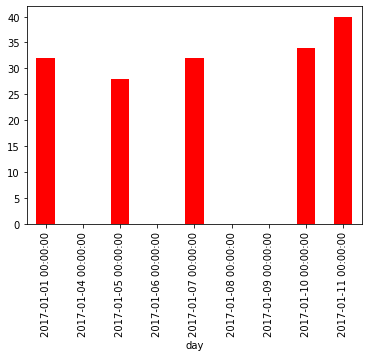

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
df.temperature.plot.bar(color='red')
plt.show()

# <font color='blue'>5.5 Handling Missing Data - replace method</font>

In [94]:
import pandas as pd
import numpy as np
df = pd.read_csv("./0_Datasets/weather_data6.csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


### Replacing single value

In [95]:
new_df = df.replace(-99999, value=np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


### Replacing list with single value

In [96]:
new_df = df.replace(to_replace=[-99999,-88888], value=0)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


### **Replacing per column**

In [97]:
new_df = df.replace({
        'temperature': -99999,
        'windspeed': -99999,
        'event': '0'
    }, np.nan)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


### **Replacing by using mapping**

In [98]:
new_df = df.replace({
        -99999: np.nan,
        'no event': 'Sunny',
    })
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


### **Regex**

In [99]:
# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Za-z]', 'windspeed': '[a-z]'},'', regex=True) 
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


### **Replacing list with another list**

In [101]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [102]:
df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


In [107]:
l1=[1,2,3,4]
l2=set(df['score'].to_list())
df.replace(l2,l1)

,score,student
0,4,rob
1,1,maya
2,3,parthiv
3,2,tom
4,1,julian
5,4,erica


# <font color='green'>6. Pandas Group By </font>

**In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics.** 

In [116]:
import pandas as pd
df = pd.read_csv("./0_Datasets/weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?

In [117]:
g = df.groupby("city")
g

**DataFrameGroupBy object looks something like below,**

In [118]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)  

city: mumbai


data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


**This is similar to SQL,**

**SELECT * from weather_data GROUP BY city**

In [119]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [120]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [121]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


**This method of splitting your dataset in smaller groups and then applying an operation 
(such as min or max) to get aggregate result is called Split-Apply-Combine. It is illustrated in a diagram below**

<img src="./0_pictures/split_apply_combine.png">

In [123]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [124]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [125]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [126]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

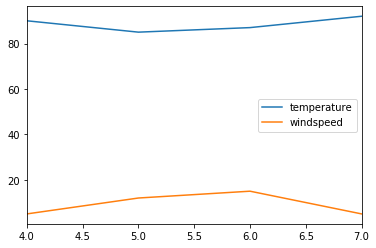

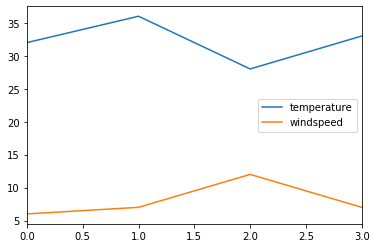

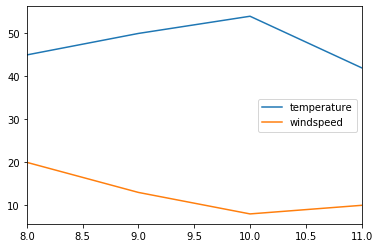

In [127]:
%matplotlib inline
g.plot()

<h4>Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups<h4>
<ol>
    <li>Days when temperature was between 80 and 90</li>
    <li>Days when it was between 50 and 60</li>
    <li>Days when it was anything else</li>
</ol>

For this you need to write custom grouping function and pass that to groupby

In [129]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [130]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [131]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy


# <font color='green'>7.Pandas Concatenate Tutorial </font>

## <font color='blue'>7.1 Basic Concatenation</font>

In [134]:
import pandas as pd

india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [135]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [136]:
# COncatenate them
df = pd.concat([india_weather, us_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## <font color='blue'>7.2 Ignore Index</font>

In [137]:
df = pd.concat([india_weather, us_weather], ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


## <font color='blue'>7.3 Concatenation and Keys</font>

In [138]:
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [139]:
df.loc["us"]

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [140]:
df.loc["india"]

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


## <font color='blue'>7.4 Concatenation Using Index</font>

In [141]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])
temperature_df

,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


In [143]:
windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

,city,windspeed
1,delhi,7
0,mumbai,12


In [144]:
df = pd.concat([temperature_df,windspeed_df],axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


## <font color='blue'>7.5 Concatenate dataframe with series</font>

In [145]:
s = pd.Series(["Humid","Dry","Rain"], name="event")
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [146]:
df = pd.concat([temperature_df,s],axis=1)
df

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


# <font color='green'>8. Pandas Merge Tutorial</font>

## <font color='blue'>8.1 Basic Merge Using a Dataframe Column</font>

In [147]:
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [148]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [149]:
df3 = pd.merge(df1, df2, on="city")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


## <font color='blue'>8.2 Type Of DataBase Joins</font>

In [150]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [151]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [152]:
df3=pd.merge(df1,df2,on="city",how="inner")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [153]:
df3=pd.merge(df1,df2,on="city",how="outer")
df3

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


In [154]:
df3=pd.merge(df1,df2,on="city",how="left")
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [155]:
df3=pd.merge(df1,df2,on="city",how="right")
df3

,city,temperature,humidity
0,new york,21.0,68
1,chicago,14.0,65
2,san diego,NaN,71


## <font color='blue'>8.3 Indicator Flag</font>

In [156]:
df3=pd.merge(df1,df2,on="city",how="outer",indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


## <font color='blue'>8.4 suffixes</font>

In [157]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [158]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [159]:
df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


## <font color='blue'>8.5 Join</font>

In [161]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1.set_index('city',inplace=True)
df1

,temperature
city,
new york,21
chicago,14
orlando,35


In [162]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2.set_index('city',inplace=True)
df2

,humidity
city,
chicago,65
new york,68
orlando,75


In [163]:
df1.join(df2,lsuffix='_l', rsuffix='_r')

,temperature,humidity
city,,
new york,21,68
chicago,14,65
orlando,35,75


# <font color='green'>9. Pivot basics</font>

In [164]:
import pandas as pd
import numpy as np
df = pd.read_csv("./0_Datasets/weather.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [165]:
df.pivot_table(index="city",columns="date")

humidity                   temperature                  
date     5/1/2017 5/2/2017 5/3/2017    5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing        26       30       35          80       77       79
mumbai         80       83       85          75       78       82
new york       56       58       60          65       66       68

<h2 style="color:brown">9.1 Margins</h2>

In [166]:
df.pivot_table(index="city",columns="date", margins=True,aggfunc=np.sum)

humidity                        temperature                       
date     5/1/2017 5/2/2017 5/3/2017  All    5/1/2017 5/2/2017 5/3/2017  All
city                                                                       
beijing        26       30       35   91          80       77       79  236
mumbai         80       83       85  248          75       78       82  235
new york       56       58       60  174          65       66       68  199
All           162      171      180  513         220      221      229  670

<h2 style="color:brown">9.2 Grouper</h2>

In [169]:
df = pd.read_csv("./0_Datasets/weather3.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [170]:
df['date'] = pd.to_datetime(df['date'])

In [171]:
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


In [172]:
df.humidity.mean()

53.833333333333336

# <font color='green'>10. Reshape pandas dataframe using melt</font>

In [173]:
import pandas as pd
df = pd.read_csv("./0_Datasets/weather11.csv")
df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [174]:
melted = pd.melt(df, id_vars=["day"], var_name='city', value_name='temperature')
melted

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


# <font color='green'>11. Reshape dataframe using stack/unstack
</font>

In [175]:
import pandas as pd
df = pd.read_excel("./0_Datasets/stocks.xlsx",header=[0,1])
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

In [176]:
df.stack()

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [177]:
df.stack(level=0)

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

In [178]:
df_stacked=df.stack()
df_stacked

Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [179]:
df_stacked.unstack()

Price                            Price to earnings ratio (P/E)           \
  Company Facebook  Google Microsoft                       Company Facebook   
0     NaN    155.0   955.0      66.0                           NaN    37.10   
1     NaN    150.0   987.0      69.0                           NaN    36.98   
2     NaN    153.0   963.0      62.0                           NaN    36.78   
3     NaN    155.0  1000.0      61.0                           NaN    36.11   
4     NaN    156.0  1012.0      66.0                           NaN    37.07   

                   Unnamed: 0_level_0                            
  Google Microsoft            Company Facebook Google Microsoft  
0   32.0     30.31         2017-06-05      NaT    NaT       NaT  
1   31.3     30.56         2017-06-06      NaT    NaT       NaT  
2   31.7     30.46         2017-06-07      NaT    NaT       NaT  
3   31.2     30.11         2017-06-08      NaT    NaT       NaT  
4   30.0     31.00         2017-06-09      NaT    NaT       NaT

<h1 style="color:blue">3 levels of column headers</h1>

In [181]:
df2 = pd.read_excel("./0_Datasets/stocks_3_levels.xlsx",header=[0,1,2])
df2

Unnamed: 0_level_0 Price Ratios                   \
  Unnamed: 0_level_1        Price                    
             Company     Facebook Google Microsoft   
0            Q1 2016          155    955        66   
1            Q2 2016          150    987        69   
2            Q3 2016          153    963        62   
3            Q4 2016          155   1000        61   
4            Q1 2017          156   1012        66   

                                                 Income Statement         \
  Price to earnings ratio (P/E)                         Net Sales          
                       Facebook Google Microsoft         Facebook Google   
0                         37.10   32.0     30.31              2.6     20   
1                         36.98   31.3     30.56              3.1     22   
2                         36.78   31.7     30.46              4.3     24   
3                         36.11   31.2     30.11              6.7     26   
4                         37.07   30.0     31.00              8.1     31   

                                         
            Net Profit                   
  Microsoft   Facebook Google Microsoft  
0     18.70       0.80   5.43      4.56  
1     21.30       0.97   5.89      5.10  
2     21.45       1.20   6.10      5.43  
3     21.88       1.67   6.50      5.89  
4     22.34       2.03   6.40      6.09

In [182]:
df2.stack()

Income Statement           Price Ratios  \
                  Net Profit Net Sales        Price   
0 Company                NaN       NaN          NaN   
  Facebook              0.80      2.60        155.0   
  Google                5.43     20.00        955.0   
  Microsoft             4.56     18.70         66.0   
1 Company                NaN       NaN          NaN   
  Facebook              0.97      3.10        150.0   
  Google                5.89     22.00        987.0   
  Microsoft             5.10     21.30         69.0   
2 Company                NaN       NaN          NaN   
  Facebook              1.20      4.30        153.0   
  Google                6.10     24.00        963.0   
  Microsoft             5.43     21.45         62.0   
3 Company                NaN       NaN          NaN   
  Facebook              1.67      6.70        155.0   
  Google                6.50     26.00       1000.0   
  Microsoft             5.89     21.88         61.0   
4 Company                NaN       NaN          NaN   
  Facebook              2.03      8.10        156.0   
  Google                6.40     31.00       1012.0   
  Microsoft             6.09     22.34         66.0   

                                          Unnamed: 0_level_0  
            Price to earnings ratio (P/E) Unnamed: 0_level_1  
0 Company                             NaN            Q1 2016  
  Facebook                          37.10                NaN  
  Google                            32.00                NaN  
  Microsoft                         30.31                NaN  
1 Company                             NaN            Q2 2016  
  Facebook                          36.98                NaN  
  Google                            31.30                NaN  
  Microsoft                         30.56                NaN  
2 Company                             NaN            Q3 2016  
  Facebook                          36.78                NaN  
  Google                            31.70                NaN  
  Microsoft                         30.46                NaN  
3 Company                             NaN            Q4 2016  
  Facebook                          36.11                NaN  
  Google                            31.20                NaN  
  Microsoft                         30.11                NaN  
4 Company                             NaN            Q1 2017  
  Facebook                          37.07                NaN  
  Google                            30.00                NaN  
  Microsoft                         31.00                NaN

In [183]:
df2.stack(level=0)

Net Profit                  Net Sales                   \
                       Facebook Google Microsoft  Facebook Google Microsoft   
0 Income Statement         0.80   5.43      4.56       2.6   20.0     18.70   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
1 Income Statement         0.97   5.89      5.10       3.1   22.0     21.30   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
2 Income Statement         1.20   6.10      5.43       4.3   24.0     21.45   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
3 Income Statement         1.67   6.50      5.89       6.7   26.0     21.88   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   
4 Income Statement         2.03   6.40      6.09       8.1   31.0     22.34   
  Price Ratios              NaN    NaN       NaN       NaN    NaN       NaN   
  Unnamed: 0_level_0        NaN    NaN       NaN       NaN    NaN       NaN   

                        Price                   Price to earnings ratio (P/E)  \
                     Facebook  Google Microsoft                      Facebook   
0 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0   955.0      66.0                         37.10   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
1 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          150.0   987.0      69.0                         36.98   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
2 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          153.0   963.0      62.0                         36.78   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
3 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          155.0  1000.0      61.0                         36.11   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   
4 Income Statement        NaN     NaN       NaN                           NaN   
  Price Ratios          156.0  1012.0      66.0                         37.07   
  Unnamed: 0_level_0      NaN     NaN       NaN                           NaN   

                                      Unnamed: 0_level_1  
                     Google Microsoft            Company  
0 Income Statement      NaN       NaN                NaN  
  Price Ratios         32.0     30.31                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2016  
1 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.3     30.56                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q2 2016  
2 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.7     30.46                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q3 2016  
3 Income Statement      NaN       NaN                NaN  
  Price Ratios         31.2     30.11                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q4 2016  
4 Income Statement      NaN       NaN                NaN  
  Price Ratios         30.0     31.00                NaN  
  Unnamed: 0_level_0    NaN       NaN            Q1 2017

In [184]:
df2.stack(level=1)

Income Statement                   \
                                        Facebook Google Microsoft   
0 Net Profit                                0.80   5.43      4.56   
  Net Sales                                 2.60  20.00     18.70   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
1 Net Profit                                0.97   5.89      5.10   
  Net Sales                                 3.10  22.00     21.30   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
2 Net Profit                                1.20   6.10      5.43   
  Net Sales                                 4.30  24.00     21.45   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
3 Net Profit                                1.67   6.50      5.89   
  Net Sales                                 6.70  26.00     21.88   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   
4 Net Profit                                2.03   6.40      6.09   
  Net Sales                                 8.10  31.00     22.34   
  Price                                      NaN    NaN       NaN   
  Price to earnings ratio (P/E)              NaN    NaN       NaN   
  Unnamed: 0_level_1                         NaN    NaN       NaN   

                                Price Ratios                    \
                                    Facebook  Google Microsoft   
0 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00   955.0     66.00   
  Price to earnings ratio (P/E)        37.10    32.0     30.31   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
1 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               150.00   987.0     69.00   
  Price to earnings ratio (P/E)        36.98    31.3     30.56   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
2 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               153.00   963.0     62.00   
  Price to earnings ratio (P/E)        36.78    31.7     30.46   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
3 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               155.00  1000.0     61.00   
  Price to earnings ratio (P/E)        36.11    31.2     30.11   
  Unnamed: 0_level_1                     NaN     NaN       NaN   
4 Net Profit                             NaN     NaN       NaN   
  Net Sales                              NaN     NaN       NaN   
  Price                               156.00  1012.0     66.00   
  Price to earnings ratio (P/E)        37.07    30.0     31.00   
  Unnamed: 0_level_1                     NaN     NaN       NaN   

                                Unnamed: 0_level_0  
                                           Company  
0 Net Profit                                   NaN  
  Net Sales                                    NaN  
  Price                                        NaN  
  Price to earnings ratio (P/E)                NaN  
  Unnamed: 0_level_1                       Q1 2016  
1 Net Profit  

# <font color='green'>12. Crosstab Tutorial
</font>

In [186]:
import pandas as pd
df = pd.read_excel("./0_Datasets/survey.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [187]:
pd.crosstab(df.Nationality,df.Handedness)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [188]:
pd.crosstab(df.Sex,df.Handedness)

Handedness,Left,Right
Sex,,
Female,2,3
Male,5,2


<h2 style="color:purple">Margins</h2>

In [189]:
pd.crosstab(df.Sex,df.Handedness, margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


<h2 style="color:purple">Multi Index Column and Rows</h2>

In [190]:
pd.crosstab(df.Sex, [df.Handedness,df.Nationality], margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [191]:
pd.crosstab([df.Nationality, df.Sex], [df.Handedness], margins=True)

Handedness          Left  Right  All
Nationality Sex                     
Bangadesh   Female     1      0    1
            Male       1      0    1
China       Female     1      1    2
            Male       1      0    1
India       Male       2      1    3
USA         Female     0      2    2
            Male       1      1    2
All                    7      5   12

<h2 style="color:purple">Normalize</h2>

In [192]:
pd.crosstab(df.Sex, df.Handedness, normalize='index')

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


<h2 style="color:purple">Aggfunc and Values</h2>

In [193]:
import numpy as np
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


# <font color='green'>13. Pandas Time Series Tutorial</font>

<h1 style="color:blue" align="center">13.1 DateTimeIndex</h1>

In [194]:
import pandas as pd
df = pd.read_csv("./0_Datasets/aapl.csv",parse_dates=["Date"], index_col="Date")
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782


In [195]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

<h3 style="color:purple">What is DatetimeIndex? Benefits of it</h3>

<h4> (1) Partial Date Index: Select Specific Months Data</h4>

In [197]:
df['2017-06-30']

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [198]:
df["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [199]:
df['2017-06'].head() 

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-06-29,144.71,145.13,142.28,143.68,31499368
2017-06-28,144.49,146.11,143.16,145.83,22082432
2017-06-27,145.01,146.16,143.62,143.73,24761891
2017-06-26,147.17,148.28,145.38,145.82,25692361


<h4>Average price of aapl's stock in June, 2017</h4>

In [200]:
df['2017-06'].Close.mean()

147.8313636363636

In [201]:
df['2017'].head(2) 

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782


<h4>(2) Select Date Range</h4>

In [202]:
df['2017-01-08':'2017-01-03']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


<h3 style="color:purple">Resampling</h3>

In [203]:
df['Close'].resample('M').mean().head()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
Freq: M, Name: Close, dtype: float64

In [204]:
df['2016-07']

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-29,104.19,104.55,103.68,104.21,27733688
2016-07-28,102.83,104.45,102.82,104.34,39869839
2016-07-27,104.26,104.35,102.75,102.95,92344820
2016-07-26,96.82,97.97,96.42,96.67,56239822
2016-07-25,98.25,98.84,96.92,97.34,40382921
2016-07-22,99.26,99.30,98.31,98.66,28313669
2016-07-21,99.83,101.00,99.13,99.43,32702028
2016-07-20,100.00,100.46,99.74,99.96,26275968
2016-07-19,99.56,100.00,99.34,99.87,23779924


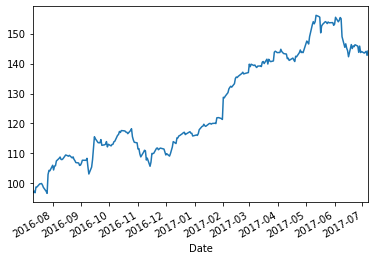

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Close'].plot()
plt.show()

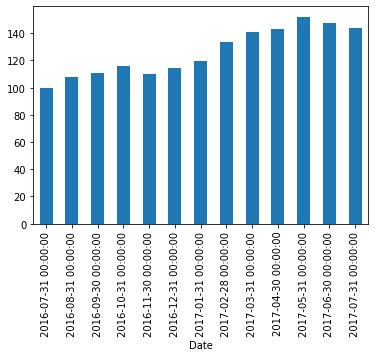

In [208]:
df['Close'].resample('M').mean().plot(kind='bar')
plt.show()

<h1 style="color:blue;" align="center">13.2 Date_range</h1>

In [209]:
import pandas as pd

In [211]:
df = pd.read_csv("./0_Datasets/aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [212]:
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B')
rng

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [213]:
df.set_index(rng, inplace=True)
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


<h3 style="color:purple">Finding missing dates from datetimeindex</h3>

In [214]:
daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
daily_index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
               '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='D')

In [215]:
daily_index.difference(df.index)

DatetimeIndex(['2016-06-04', '2016-06-05', '2016-06-11', '2016-06-12',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-06-26'],
              dtype='datetime64[ns]', freq=None)

<h3 style="color:purple">Benefits of having DatetimeIndex</h3>

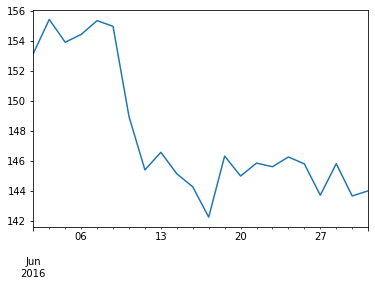

In [216]:
%matplotlib inline
df.Close.plot()
plt.show()

In [217]:
df["2016-06-01":"2016-06-10"].Close.mean()

152.72125

<h3 style="color:purple">asfreq</h3>

In [218]:
df.index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

In [219]:
df.asfreq('D',method='pad') # Daily

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-04,154.34,154.45,153.46,153.93,25331662
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


In [220]:
df.asfreq('W',method='pad') # W=week

,Open,High,Low,Close,Volume
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-12,145.74,146.09,142.51,145.42,72307330
2016-06-19,143.66,146.74,143.66,146.34,32541404
2016-06-26,147.17,148.28,145.38,145.82,25692361


In [223]:
df.asfreq('H',method='pad').head() # H=Hourly

,Open,High,Low,Close,Volume
2016-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088


In [224]:
df.asfreq('H',method='pad').shape

(697, 5)

<h3 style="color:purple"> generating DatetimeIndex with periods argument</h3>

In [225]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               '2011-01-02 00:00:00', '2011-01-02 01:00:00',
               '2011-01-02 02:00:00', '2011-01-02 03:00:00',
               '2011-01-02 04:00:00', '2011-01-02 05:00:00',
               '2011-01-02 06:00:00', '2011-01-02 07:00:00',
               '2011-01-

In [226]:
import numpy as np
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
ts.head(20)

2011-01-01 00:00:00    2
2011-01-01 01:00:00    8
2011-01-01 02:00:00    9
2011-01-01 03:00:00    0
2011-01-01 04:00:00    5
2011-01-01 05:00:00    1
2011-01-01 06:00:00    5
2011-01-01 07:00:00    3
2011-01-01 08:00:00    5
2011-01-01 09:00:00    5
2011-01-01 10:00:00    0
2011-01-01 11:00:00    5
2011-01-01 12:00:00    6
2011-01-01 13:00:00    4
2011-01-01 14:00:00    9
2011-01-01 15:00:00    0
2011-01-01 16:00:00    5
2011-01-01 17:00:00    2
2011-01-01 18:00:00    8
2011-01-01 19:00:00    5
Freq: H, dtype: int32

<h1 style="color:blue" align="center">13.3 Handling Holidays</h1>

In [227]:
import pandas as pd
df = pd.read_csv("./0_Datasets/aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [228]:
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq='B')
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

**Using 'B' frequency is not going to help because 4th July was holiday and 'B' is not taking that into account. 
It only accounts for weekends**

<h3 style="color:purple">Using CustomBusinessDay to generate US holidays calendar frequency</h3>

In [229]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",end="7/23/2017", freq=us_cal)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

In [231]:
#df.set_index(rng,inplace=True)
#df.head()

**You can define your own calendar using AbstractHolidayCalendar as shown below. USFederalHolidayCalendar is the only calendar available in pandas library and it serves as an example for those who want to write their own custom calendars. Here is the link for USFederalHolidayCalendar implementation** https://github.com/pandas-dev/pandas/blob/master/pandas/tseries/holiday.py

<h3 style="color:purple">AbstractHolidayCalendar</h3>

In [232]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=4, day=15),#, observance=nearest_workday),
    ]
    
my_bday = CustomBusinessDay(calendar=myCalendar())
pd.date_range('4/1/2017','4/30/2017',freq=my_bday)

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28'],
              dtype='datetime64[ns]', freq='C')

<h3 style="color:purple">CustomBusinessDay</h3>

**Weekend in egypt is Friday and Saturday. Sunday is just a normal weekday and you can handle this custom week schedule using
CystomBysinessDay with weekmask as shown below**

In [233]:
egypt_weekdays = "Sun Mon Tue Wed Thu"

b = CustomBusinessDay(weekmask=egypt_weekdays)

pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27'],
              dtype='datetime64[ns]', freq='C')

**You can also add holidays to this custom business day frequency**

In [234]:
b = CustomBusinessDay(holidays=['2017-07-04', '2017-07-10'], weekmask=egypt_weekdays)

pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-09', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', freq='C')

**Mathematical operations on date object using custom business day**

In [236]:
from datetime import datetime
dt = datetime(2017,7,9)
dt

datetime.datetime(2017, 7, 9, 0, 0)

In [237]:
dt + 1*b

Timestamp('2017-07-11 00:00:00')

<h1 style="color:blue" align="center">13.4 to_datetime </h1>

In [239]:
import pandas as pd
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [240]:
dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2016-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

<h3 style="color:purple">European style dates with day first</h3>

In [241]:
pd.to_datetime('30-12-2016')

Timestamp('2016-12-30 00:00:00')

In [242]:
pd.to_datetime('5-1-2016', dayfirst=True)

Timestamp('2016-01-05 00:00:00')

<h3 style="color:purple">Custom date time format</h3>

In [243]:
pd.to_datetime('2017$01$05', format='%Y$%m$%d')

Timestamp('2017-01-05 00:00:00')

In [244]:
pd.to_datetime('2017#01#05', format='%Y#%m#%d')

Timestamp('2017-01-05 00:00:00')

<h3 style="color:purple">Handling invalid dates</h3>

In [245]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')

Index(['2017-01-05', 'Jan 6, 2017', 'abc'], dtype='object')

In [246]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

DatetimeIndex(['2017-01-05', '2017-01-06', 'NaT'], dtype='datetime64[ns]', freq=None)

<h3 style="color:purple">Epoch</h3>

**Epoch or Unix time means number of seconds that have passed since Jan 1, 1970 00:00:00 UTC time**

In [247]:
current_epoch = 1501324478
pd.to_datetime(current_epoch, unit='s')

Timestamp('2017-07-29 10:34:38')

In [248]:
pd.to_datetime(current_epoch*1000, unit='ms')

Timestamp('2017-07-29 10:34:38')

In [249]:
t = pd.to_datetime([current_epoch], unit='s')
t

DatetimeIndex(['2017-07-29 10:34:38'], dtype='datetime64[ns]', freq=None)

In [250]:
t.view('int64')

array([1501324478000000000], dtype=int64)

<h1 style="color:blue" align="center">13.5 Period and PeriodIndex</h1>

In [261]:
import datetime
a = '2010-01-31'
datee = datetime.datetime.strptime(a, "%Y-%m-%d")

In [262]:
datee.day

31

In [263]:
datee.month

1

In [264]:
datee.year

2010

In [267]:
year,month,day=a.split('-')
print(f"{day} {month} {year}")

31 01 2010


<h3 style="color:purple">Yearly Period</h3>

In [251]:
import pandas as pd
y = pd.Period('2016')
y

Period('2016', 'A-DEC')

In [252]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [253]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [255]:
y.is_leap_year # Only if the year is divisible by 4 with no remainder

True

<h3 style="color:purple">Monthly Period</h3>

In [256]:
m = pd.Period('2017-12')
m

Period('2017-12', 'M')

In [257]:
m.start_time

Timestamp('2017-12-01 00:00:00')

In [258]:
m.end_time

Timestamp('2017-12-31 23:59:59.999999999')

In [259]:
m+1

Period('2018-01', 'M')

<h3 style="color:purple">Daily Period</h3>

In [268]:
d = pd.Period('2016-02-28', freq='D')
d

Period('2016-02-28', 'D')

In [269]:
d.start_time

Timestamp('2016-02-28 00:00:00')

In [270]:
d.end_time

Timestamp('2016-02-28 23:59:59.999999999')

In [271]:
d+1

Period('2016-02-29', 'D')

<h3 style="color:purple">Hourly Period</h3>

In [272]:
h = pd.Period('2017-08-15 23:00:00',freq='H')
h

Period('2017-08-15 23:00', 'H')

In [273]:
h+1

Period('2017-08-16 00:00', 'H')

<h4>Achieve same results using pandas offsets hour</h4>

In [274]:
h+pd.offsets.Hour(1)

Period('2017-08-16 00:00', 'H')

<h3 style="color:purple">Quarterly Period</h3>

In [275]:
q1= pd.Period('2017Q1', freq='Q-JAN')
q1

Period('2017Q1', 'Q-JAN')

In [276]:
q1.start_time

Timestamp('2016-02-01 00:00:00')

In [277]:
q1.end_time

Timestamp('2016-04-30 23:59:59.999999999')

<h4>Use asfreq to convert period to a different frequency</h4>

In [278]:
q1.asfreq('M',how='start')

Period('2016-02', 'M')

In [279]:
q1.asfreq('M',how='end')

Period('2016-04', 'M')

<h3 style="color:purple">Weekly Period</h3>

In [2]:
import pandas as pd
w = pd.Period('2017-07-05',freq='W')
w

Period('2017-07-03/2017-07-09', 'W-SUN')

In [3]:
w+1

Period('2017-07-10/2017-07-16', 'W-SUN')

In [4]:
w2 = pd.Period('2017-08-15',freq='W')
w2

Period('2017-08-14/2017-08-20', 'W-SUN')

In [5]:
w2-w

<6 * Weeks: weekday=6>

<h3 style="color:purple">PeriodIndex and period_range</h3>

In [6]:
r = pd.period_range('2011', '2017', freq='q')
r

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [7]:
r[0].start_time

Timestamp('2011-01-01 00:00:00')

In [8]:
r[0].end_time

Timestamp('2011-03-31 23:59:59.999999999')

**Walmart's fiscal year ends in Jan, below is how you generate walmart's fiscal quarters between 2011 and 2017**

In [9]:
r = pd.period_range('2011', '2017', freq='q-jan')
r

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [10]:
r[0].start_time

Timestamp('2010-11-01 00:00:00')

In [11]:
r[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [12]:
r = pd.PeriodIndex(start='2016-01', freq='3M', periods=10)
r

C:\Users\Alem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  """Entry point for launching an IPython kernel.


PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10', '2018-01', '2018-04'],
            dtype='period[3M]', freq='3M')

In [ ]:
import pandas as pd
ps = pd.Series(np.random.randn(len(idx)), idx)
ps

<h4>Partial Indexing</h4>

In [ ]:
ps['2016']

In [ ]:
ps['2016':'2017']

<h4>Converting between representations</h4>

In [ ]:
pst = ps.to_timestamp()
pst

In [ ]:
pst.index

In [ ]:
ps = pst.to_period()
ps

In [ ]:
ps.index

<h3 style="color:purple">Processing Wal Mart's Financials</h3>

In [5]:
import pandas as pd
df = pd.read_csv("./0_Datasets/wmt.csv")
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [6]:
df.set_index("Line Item",inplace=True)
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [7]:
df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [8]:
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [9]:
df.index[0].start_time

Timestamp('2016-02-01 00:00:00')

<h4 style="color:green">Add start date end date columns to dataframe</h4>

In [10]:
df["Start Date"]=df.index.map(lambda x: x.start_time)
df

Line Item,Revenue,Expenses,Profit,Start Date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [11]:
df["End Date"]=df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


<h1 style="color:blue" align="center">13.6 Pandas Time Series Analysis: Handling Time Zones</h1>

**We live in a world with different timezones. If you are having morning coffee in new york at 9 AM it might be a time for dinner in Mumbai, India because it would be 6.30 PM there. Handling time zone could become necessity while doing time series analysis in Pandas**

<img src="./0_pictures/timezones_world_map.png" />

**Read microsoft's intraday stock prize**

In [12]:
import pandas as pd
df = pd.read_csv("./0_Datasets/msft.csv", header=1,index_col='Date Time',parse_dates=True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [13]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

<h3>Two types of datetimes in python</h3>
<ol>
    <li>Naive (no timezone awareness)</li>
    <li>Timezone aware datetime</li>
<ol>

<h3 style="color:purple">Convert naive DatetimeIndex to timezone aware DatetimeIndex using tz_localize</h3>

In [14]:
df.tz_localize(tz='US/Eastern')
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [15]:
df.index = df.index.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

<h3 style="color:purple">Convert to Berlin time using tz_convert</h3>

In [16]:
df = df.tz_convert('Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [17]:
df.index

DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

In [18]:
from pytz import all_timezones
print (all_timezones)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

<h3 style="color:purple">Convert to Mumbai time</h3>

In [19]:
df.index = df.index.tz_convert('Asia/Calcutta') # tz database doesn't have any Mumbai timezone but calcutta and mumbai are both in same timezone so we will use that
df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


<h3 style="color:purple">Using timezones in date_range</h3>

In [20]:
london = pd.date_range('3/6/2012 00:09:00', periods=10, freq='H',tz='Europe/London')
london

DatetimeIndex(['2012-03-06 00:09:00+00:00', '2012-03-06 01:09:00+00:00',
               '2012-03-06 02:09:00+00:00', '2012-03-06 03:09:00+00:00',
               '2012-03-06 04:09:00+00:00', '2012-03-06 05:09:00+00:00',
               '2012-03-06 06:09:00+00:00', '2012-03-06 07:09:00+00:00',
               '2012-03-06 08:09:00+00:00', '2012-03-06 09:09:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

<h3>Pandas documentation indicates that difference between pytz timezone and dateutil timezones is</h3>
<ol>
    <li>In pytz you can find a list of common (and less common) time zones using from pytz import common_timezones, all_timezones</li>
    <li>dateutil uses the OS timezones so there isn’t a fixed list available. For common zones, the names are the same as pytz</li>
<ol>

<h3 style="color:purple">Airthmetic between different timezones</h3>

In [21]:
rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min')
s = pd.Series(range(10),index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [22]:
b = s.tz_localize(tz="Europe/Berlin")
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
Freq: 30T, dtype: int64

In [23]:
b.index

DatetimeIndex(['2017-08-22 09:00:00+02:00', '2017-08-22 09:30:00+02:00',
               '2017-08-22 10:00:00+02:00', '2017-08-22 10:30:00+02:00',
               '2017-08-22 11:00:00+02:00', '2017-08-22 11:30:00+02:00',
               '2017-08-22 12:00:00+02:00', '2017-08-22 12:30:00+02:00',
               '2017-08-22 13:00:00+02:00', '2017-08-22 13:30:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='30T')

In [24]:
m = s.tz_localize(tz="Asia/Calcutta")
m.index

DatetimeIndex(['2017-08-22 09:00:00+05:30', '2017-08-22 09:30:00+05:30',
               '2017-08-22 10:00:00+05:30', '2017-08-22 10:30:00+05:30',
               '2017-08-22 11:00:00+05:30', '2017-08-22 11:30:00+05:30',
               '2017-08-22 12:00:00+05:30', '2017-08-22 12:30:00+05:30',
               '2017-08-22 13:00:00+05:30', '2017-08-22 13:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq='30T')

In [25]:
m

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
Freq: 30T, dtype: int64

**It will first convert individual timezones to UTC and then align datetimes to perform addition/subtraction etc. operations**

In [26]:
b + m 

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
Freq: 30T, dtype: float64

**Date alignment is shown below**

<img src="./0_pictures/alignment.png" />

<h1 style="color:blue" align="center">13.7 Shift Lag</h1>

In [29]:
import pandas as pd
df = pd.read_csv("./0_Datasets/fb.csv",parse_dates=['Date'],index_col='Date')
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


<img src="./0_pictures/shift_image.png" />

<h2 style="color:purple">Shift</h2>

In [30]:
df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [31]:
df.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [32]:
df['Prev Day Price'] = df['Price'].shift(1)
df

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [33]:
df['Price Change'] = df['Price'] - df['Prev Day Price']
df

,Price,Prev Day Price,Price Change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


In [34]:
df['5 day return'] =  (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev Day Price,Price Change,5 day return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [35]:
df = df[['Price']]
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


<h2 style="color:purple">tshift</h2>

In [36]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [37]:
df.index = pd.date_range(start='2017-08-15',periods=10, freq='B')
df

,Price
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32
2017-08-28,167.24


In [38]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [39]:
df.tshift(1)

,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24


# <font color='green'>End</font>